Создаем "городской" датасет

In [1]:
import pandas as pd
import numpy as np

import re


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Загружаем датасеты ##

Ленинские города и поселки уже не нужны, их всего 5, они только исказят картину.

### Города и поселки ###

In [2]:
# загружаем все города и поселки

all_cities = pd.read_excel('C:/00_Projects/Lenin/Datasets/01_FIAS/03_all_cities.xlsx', sheet_name='cities')

### Улицы ###

In [3]:
# загружаем все улицы

work_streets = pd.read_csv('C:/00_Projects/Lenin/Datasets/01_FIAS/05_all_streets.csv')

In [4]:
# загружаем ленинские улицы (только точные)

lenin_streets_strict = pd.read_excel('C:/00_Projects/Lenin/Datasets/01_FIAS/06_lenin_streets.xlsx', sheet_name='lenin')

In [5]:
# загружаем ленинские улицы (без переулков)

lenin_only_streets = pd.read_excel('C:/00_Projects/Lenin/Datasets/01_FIAS/06_lenin_streets.xlsx', sheet_name='lenin_os')

### Памятники ###

In [6]:
# Загружаем памятники из ОКН

lenin_monuments_OKN = pd.read_excel('C:/00_Projects/Lenin/Datasets/02_Monuments/08_lenin_reestrOKN.xlsx',
                                     sheet_name='need')

In [7]:
# Загружаем памятники из базы leninstatues

lenin_monuments_lst = pd.read_excel('C:/00_Projects/Lenin/Datasets/02_Monuments/09_lenin_monuments.xlsx',
                                     sheet_name='need')

### Столицы регионов ###

In [8]:
# загружаем столицы регионов

reg_capitals = pd.read_excel('C:/00_Projects/Lenin/Datasets/03_Other/region_name.xlsx', sheet_name='reg_capitals')

### Города с населением больше 100 тыс. ###

In [9]:
cities_100 = pd.read_excel('C:/00_Projects/Lenin/Datasets/03_Other/cities_rf_100_ph.xlsx', sheet_name='cities_100')

### Названия регионов для Datawrapper ###

In [10]:
region_name = pd.read_excel('C:/00_Projects/Lenin/Datasets/03_Other/region_name.xlsx', sheet_name='reg_name')

In [11]:
region_work_only_city = region_name[['datawrapperName', 'region']]

## Считаем столицы регионов ##

In [12]:
# считаем количество улиц по населенным пунктам

city_lsts_strict_all = (lenin_streets_strict
                        .groupby(['region', 'mun_district', 'city', 'city_type'], as_index=False)
                        .agg({'street': 'count'})
                        .rename(columns={'street': 'lenin_street_number'})
                       )

In [13]:
# считаем количество памятников из реестра ОКН по населенным пунктам

city_monuments_OKN_all = (lenin_monuments_OKN
                          .groupby(['region', 'mun_district', 'city', 'city_type'], as_index=False)
                          .agg({'monument': 'count'})
                          .rename(columns={'monument': 'OKN_number'})
                         )

In [14]:
# считаем количество памятников из базы lst по населенным пунктам

city_monuments_lst_all = (lenin_monuments_lst
                          .groupby(['region', 'mun_district', 'city', 'city_type'], as_index=False)
                          .agg({'original_name': 'count'})
                          .rename(columns={'original_name': 'lst_number'})
                         )

In [15]:
# присоединяем

reg_capitals = reg_capitals.merge(city_lsts_strict_all,
                  on=['region', 'mun_district', 'city', 'city_type'],
                   how='left')

reg_capitals = reg_capitals.merge(city_monuments_OKN_all,
                  on=['region', 'mun_district', 'city', 'city_type'],
                   how='left')

reg_capitals = reg_capitals.merge(city_monuments_lst_all,
                  on=['region', 'mun_district', 'city', 'city_type'],
                   how='left')

In [16]:
# заполняем NaN

reg_capitals.fillna(0, inplace=True)

In [17]:
reg_capitals.sort_values('lenin_street_number', ascending=False).head(10)

,region,mun_district,city_type,city,lenin_street_number,OKN_number,lst_number
27,Кировская область,Киров,г,Киров,7.0,1.0,7.0
35,Липецкая область,Липецк,г,Липецк,6.0,0.0,12.0
58,Санкт-Петербург,Санкт-Петербург,г,Санкт-Петербург,5.0,6.0,61.0
15,Воронежская область,Воронеж,г,Воронеж,5.0,1.0,13.0
46,Омская область,Омск,г,Омск,4.0,7.0,17.0
13,Волгоградская область,Волгоград,г,Волгоград,4.0,2.0,16.0
12,Владимирская область,Владимир,г,Владимир,4.0,2.0,8.0
18,Свердловская область,Екатеринбург,г,Екатеринбург,4.0,1.0,11.0
51,Карелия,Петрозаводск,г,Петрозаводск,4.0,1.0,3.0
32,Курганская область,Курган,г,Курган,4.0,1.0,6.0


In [18]:
reg_capitals.describe()

,lenin_street_number,OKN_number,lst_number
count,85.000000,85.000000,85.000000
mean,2.188235,1.917647,9.329412
std,1.409949,2.578352,13.916749
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000
50%,2.000000,1.000000,7.000000
75%,3.000000,2.000000,11.000000
max,7.000000,19.000000,112.000000


Text(0.5, 0.98, '')

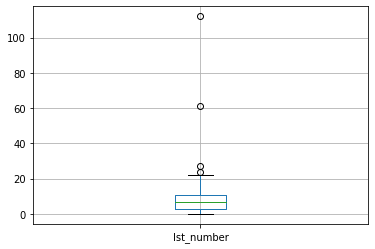

In [19]:
ax = reg_capitals.boxplot(column='lst_number')

ax.get_figure().suptitle('')

### Города 100-тысячники ###

In [20]:
cities_100

,region,mun_district,city_type,city,population
0,Москва,Москва,г,Москва,12678079
1,Санкт-Петербург,Санкт-Петербург,г,Санкт-Петербург,5398064
2,Новосибирская область,Новосибирск,г,Новосибирск,1625631
3,Свердловская область,Екатеринбург,г,Екатеринбург,1493749
4,Татарстан,Казань,г,Казань,1257391
...,...,...,...,...,...
168,Ханты-Мансийский АО,Ханты-Мансийск,г,Ханты-Мансийск,101466
169,Самарская область,Новокуйбышевск,г,Новокуйбышевск,100455
170,Курская область,Железногорск,г,Железногорск,100446
171,Московская область,Сергиев Посад,г,Сергиев Посад,100335


In [21]:
# группируем ленинские улицы (вариант без переулков) 

lenin_only_streets_temp = (lenin_only_streets
                           .groupby(['region', 'mun_district', 'city_type', 'city'], as_index=False)
                           .agg({'street': 'count'})
                           .rename(columns={'street': 'lenin_street_number'})
                          )

In [22]:
# группируем памятники ОКН 

lenin_monuments_OKN_temp = (lenin_monuments_OKN
                            .groupby(['region', 'mun_district', 'city_type', 'city'], as_index=False)
                            .agg({'monument': 'count'})
                            .rename(columns={'monument': 'monument_OKN_number'})
                           )

In [23]:
# группируем памятники lst

lenin_monuments_lst_temp = (lenin_monuments_lst
                       .groupby(['region', 'mun_district', 'city_type', 'city'], as_index=False)
                       .agg({'original_name': 'count'})
                       .rename(columns={'original_name': 'monument_lst_number'})
                      )

In [24]:
# считаем общее количество улиц

total_streets_temp = (work_streets
                      .groupby(['region', 'mun_district', 'city_type', 'city'], as_index=False)
                      .agg({'street': 'count'})
                      .rename(columns={'street': 'street_number'})
                     )

In [25]:
cities_100 = cities_100.merge(total_streets_temp,
                              on=['region', 'mun_district', 'city_type', 'city'],
                              how='left'
                             )

cities_100 = cities_100.merge(lenin_only_streets_temp,
                              on=['region', 'mun_district', 'city_type', 'city'],
                              how='left'
                             )

cities_100 = cities_100.merge(lenin_monuments_OKN_temp,
                              on=['region', 'mun_district', 'city_type', 'city'],
                              how='left'
                             )

cities_100 = cities_100.merge(lenin_monuments_lst_temp,
                              on=['region', 'mun_district', 'city_type', 'city'],
                              how='left'
                             )

In [26]:
# заполняем NaN-значения

cities_100.fillna(0, inplace=True)

In [27]:
cities_100.sort_values('monument_lst_number', ascending=False)

,region,mun_district,city_type,city,population,street_number,lenin_street_number,monument_OKN_number,monument_lst_number
0,Москва,Москва,г,Москва,12678079,3521,3.0,9.0,112.0
1,Санкт-Петербург,Санкт-Петербург,г,Санкт-Петербург,5398064,2170,5.0,6.0,61.0
5,Нижегородская область,Нижний Новгород,г,Нижний Новгород,1252236,1406,3.0,3.0,27.0
15,Краснодарский край,Краснодар,г,Краснодар,932629,2050,2.0,19.0,24.0
16,Саратовская область,Саратов,г,Саратов,838042,3152,1.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...
140,Ингушетия,Назрань,г,Назрань,122261,249,0.0,0.0,0.0
67,Чечня,Грозный,г,Грозный,305911,1523,0.0,1.0,0.0
132,Ханты-Мансийский АО,Нефтеюганск,г,Нефтеюганск,127255,31,1.0,0.0,0.0
72,Ханты-Мансийский АО,Нижневартовск,г,Нижневартовск,277668,161,1.0,0.0,0.0


In [28]:
cities_100['monument_weight'] = round(cities_100.monument_lst_number  / cities_100.street_number, 4)

In [29]:
cities_100['monument_OKN_weight'] = round(cities_100.monument_OKN_number / cities_100.street_number, 4)

In [30]:
cities_100.shape

(173, 11)

## Записываем результат ##

In [31]:
# записываем csv

cities_100.to_csv('C:/00_Projects/Lenin/Datasets/04_work_data/cities_100.csv', sep=',', encoding='utf-8', index=False)